<div style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:center;
                 font-family: Trebuchet MS;">Data Science Salaries
    </h1>
</div>

<div style="width:100%;text-align: center;"> 
    <img align=middle src="https://miro.medium.com/max/993/1*mgXvzNcwfpnBawI6XTkVRg.png" alt="Data Science" style="height:500px;margin-top:2rem;">
</div>

<div style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>



* [<span style="font-family: Trebuchet MS; font-size:15px;">1. Imports</span>](#imports)
* [<span style="font-family: Trebuchet MS; font-size:15px;">2. Plot Configuration</span>](#plot-configuration)
* [<span style="font-family: Trebuchet MS; font-size:15px;">3. Loading Dataset</span>](#loading-dataset)
* [<span style="font-family: Trebuchet MS; font-size:15px;">4. Understanding the Data</span>](#understanding-the-data)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">4.1 Checking Null Values</span>](#checking-null-values)
* [<span style="font-family: Trebuchet MS; font-size:15px;">5. Exploratory Data Analysis</span>](#exploratory-data-analysis)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1 Univariate Analysis</span>](#univariate-analysis)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.1 Work Year</span>](#work_year)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.2 Experience Level</span>](#experience_level)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.3 Employment Type</span>](#employment_type)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.4 Job Title</span>](#job_title)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.5 Salary</span>](#salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.6 Employee Residence</span>](#employee_residence)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.7 Remote Ratio</span>](#remote_ratio)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.8 Company Location</span>](#company_location)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.1.9 Company Size</span>](#company_size)
    * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2 Multivariate Analysis</span>](#multivariate-analysis)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.1 Work Year and Salary</span>](#work_year-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.2 Experience Level and Salary</span>](#experience_level-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.3 Employment Type and Salary</span>](#employment_type-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.4 Job Title and Salary</span>](#job_title-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.5 Employee Residence and Salary</span>](#employee_residence-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.6 Remote Ratio and Salary</span>](#remote_ratio-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.7 Company Location and Salary</span>](#company_location-salary)
        * [<span style="font-family: Trebuchet MS; font-size:15px;">5.2.8 Company Size and Salary</span>](#company_size-salary)
* [<span style="font-family: Trebuchet MS; font-size:15px;">6. Conclusion</span>](#conclusion)

<div id='imports'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1. Imports
    </h2>
</div>

In [6]:
%%capture
!pip install country_converter
import country_converter as coco
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

<div id='plot-configuration'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">2. Plot Configuration
    </h2>
</div>

In [7]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_palette("Accent")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

<div id='loading-dataset'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">3. Loading Dataset
    </h2>
</div>
Let's first check the dataset to get the first insight.

In [8]:
salaries = pd.read_csv("ds_salaries.csv", index_col=0, encoding="utf-8")
salaries.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1               JP            S  
2               GB            M  
3               HN            S  
4               US            L

In [9]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


<div id='understanding-the-data'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4. Understanding the Data
    </h2>
</div>

Dataset consists of 11 features.
1. **work_year**: The year the salary was paid.
2. **experience_level**: The experience level in the job during the year.
    - EN (Entry-level) / Junior
    - MI (Mid-level) / Intermediate 
    - SE (Senior-level) / Expert
    - EX (Expert-level) / Director
3. **employment_type**: The type of employment for the role.
    - PT (Part-time)
    - FT (Full-time)
    - CT (Contact)
    - FL (Freelance)
4. **job_title**: The role worked during the year.
5. **salary**: The total gross salary amount paid.
6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
    - USD (United States Dollar)
    - EUR (Euro)
    - GBP (Great Britain Pound)
    - ...
7. **salary_in_usd**: The salary in USD(United States Dollars).
8. **employee_residence**: Employee's primary country of residence in during the work year as ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
9. **remote_ratio**: The overall amount of work done remotely.
    - 0 (No remote)
    - 50 (Partially remote)
    - 100 (Fully remote)
10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
11. **company_size**: The average number of people that worked for the company during the year.
    - S (Small) (< 50)
    - M (Medium) (50 < & > 250)
    - L (Large) (> 250)

I will try to analyze the salaries only in **USD**. Therefore, I will remove the **salary_currency** and **salary** columns. Also, change the name of the **salary_in_usd** column to just **salary**.

In [10]:
salaries.drop(labels=["salary", "salary_currency"], axis=1, inplace=True)
salaries.rename(columns={"salary_in_usd": "salary"}, inplace=True)

In [11]:
salaries.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary employee_residence  remote_ratio company_location company_size  
0   79833                 DE             0               DE            L  
1  260000                 JP             0               JP            S  
2  109024                 GB            50               GB            M  
3   20000                 HN             0               HN            S  
4  150000                 US            50               US            L

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4.1 Checking Null Values
    </h3>
</div>

First, let's check the dataset if it contains any null values.

In [12]:
salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no null values in the dataset; therefore, we can proceed to exploratory data analysis without any extra steps.

<div id='exploratory-data-analysis'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5. Exploratory Data Analysis
    </h2>
</div>

<div id='univariate-analysis'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1  Univariate Analysis
    </h3>
</div>

We will analyze each feature individually. 
* For the `category` type features, we will use **bar plot** and **pie chart**. 
* For the `numerical` type features, we will use **box plot** and **histogram**.

In [13]:
## Helper Functions

def univariate_multi_plot(df=salaries, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()
    
    
def univariate_single_plot(df=salaries, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel", 
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()
    
    
def univariate_numerical_plot(df=salaries, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

In [14]:
# for interpretability in graphs
salaries["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Mid", "Senior", "Expert"], inplace=True)
salaries["remote_ratio"].replace([0, 50, 100], ["On-site", "Hybrid", "Remote"], inplace=True)
salaries["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
salaries["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

<div id='work_year'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.1  Work Year
    </h3>
</div>

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


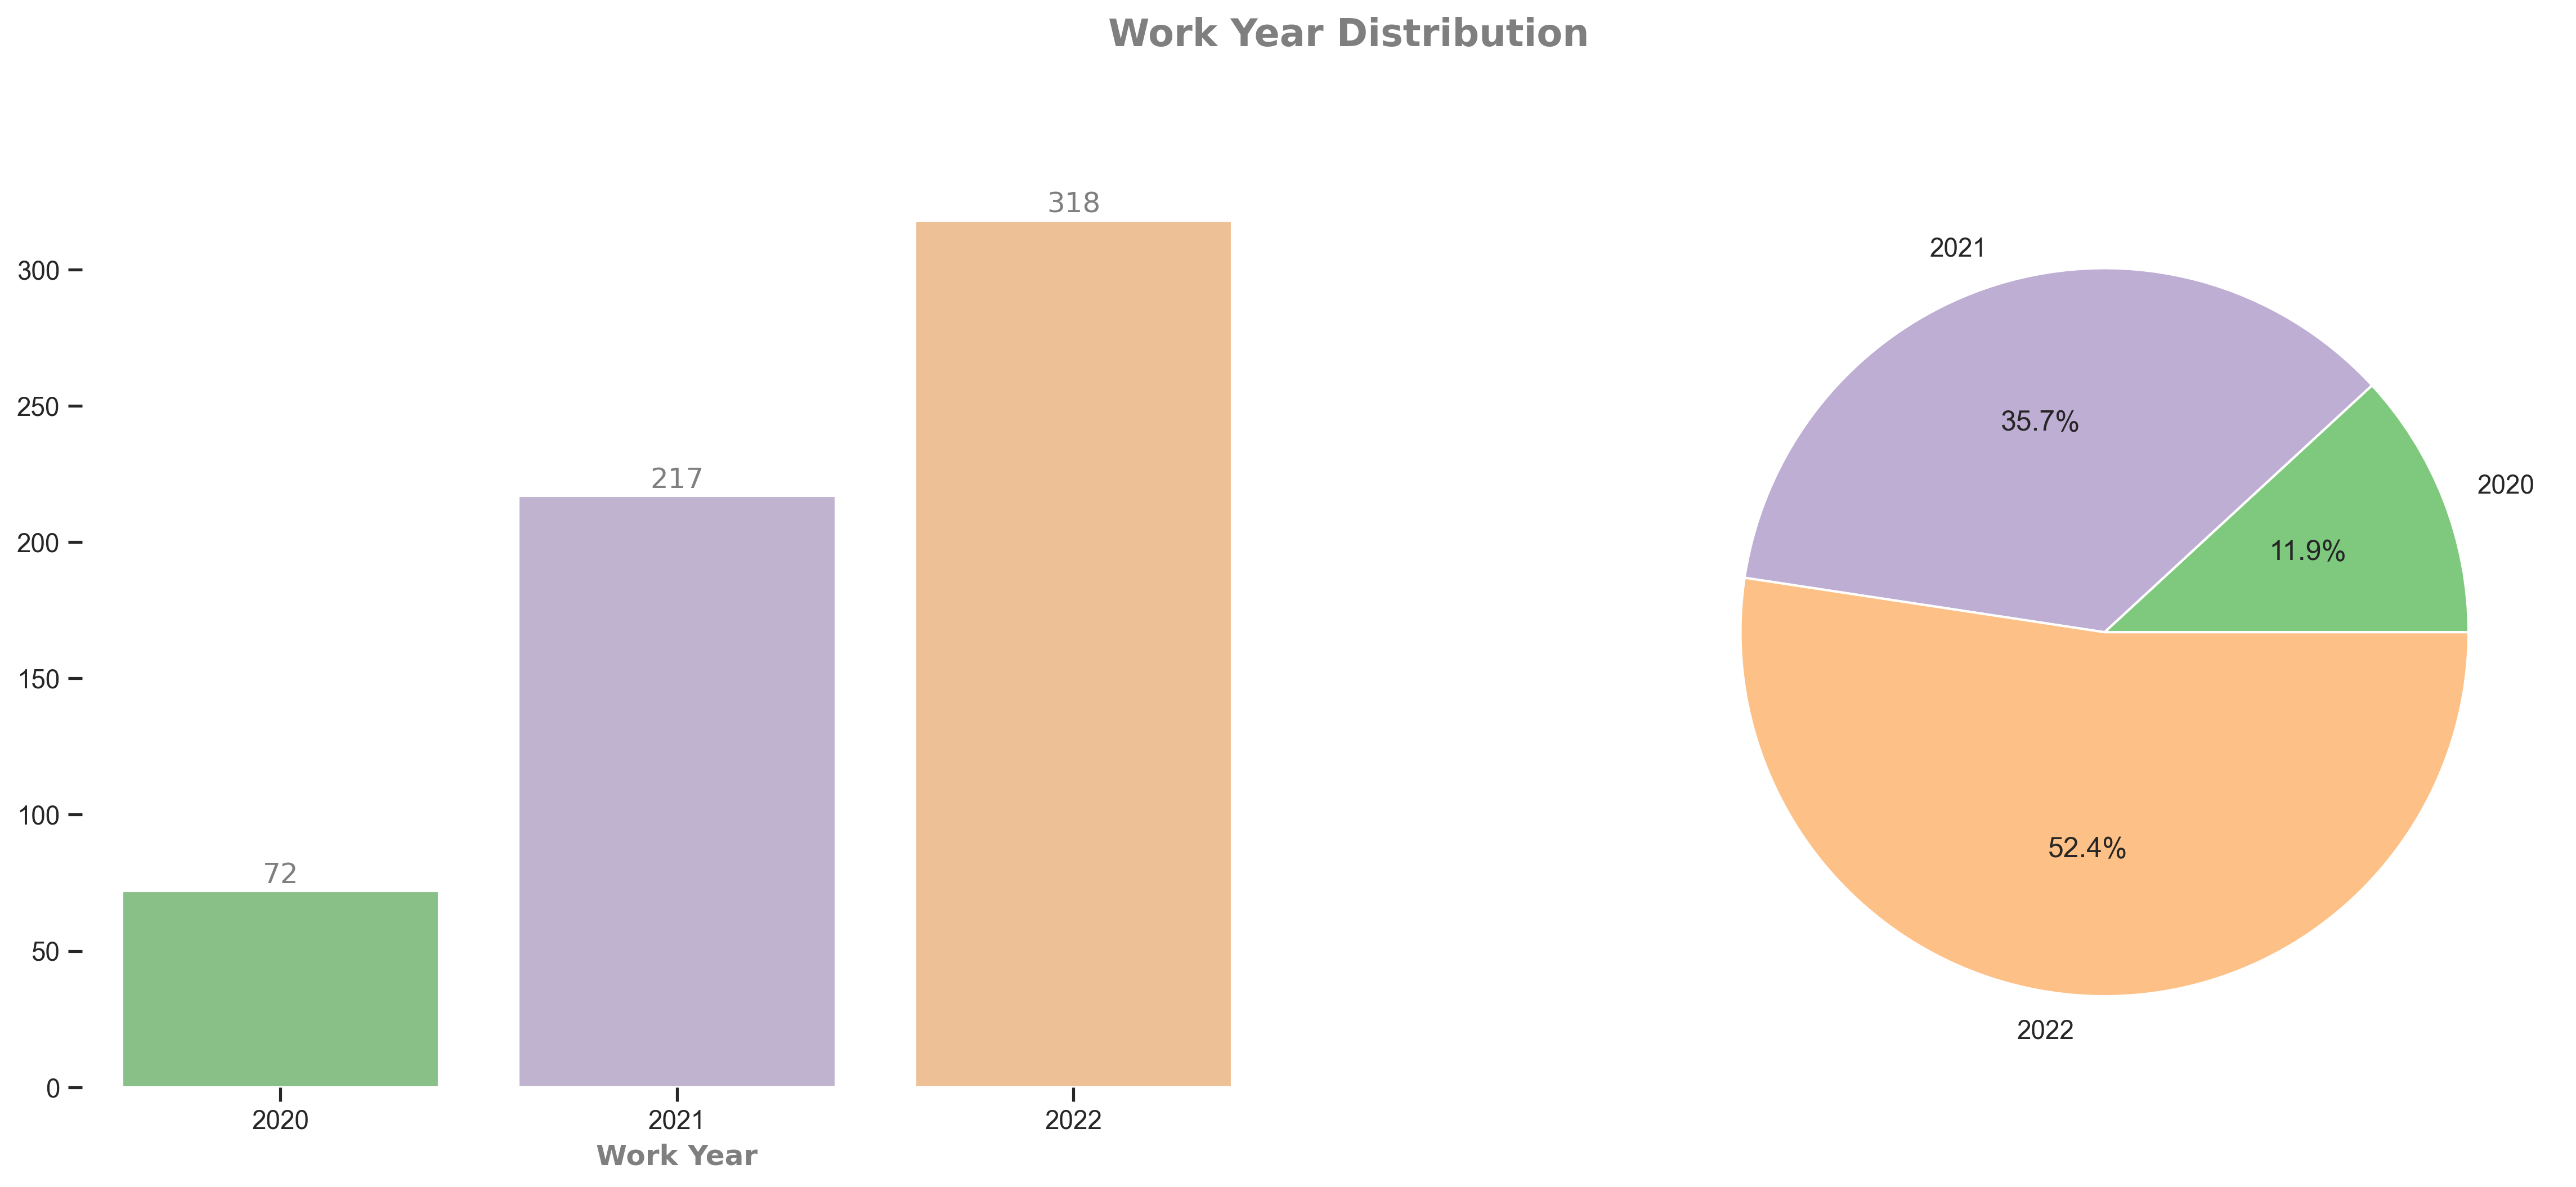

In [15]:
univariate_multi_plot(x="work_year", xlabel="Work Year")

* More than half of the salary data is from **2022**. 
* Almost 1/3 of the data are from **2021**
* Rest of the data are from **2020** with approximately **11.9%** share.


* **Possible Conclusion**: Number of data science jobs are increasing over the years.

<div id = 'experience_level'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.2  Experience Level
    </h3>
</div>

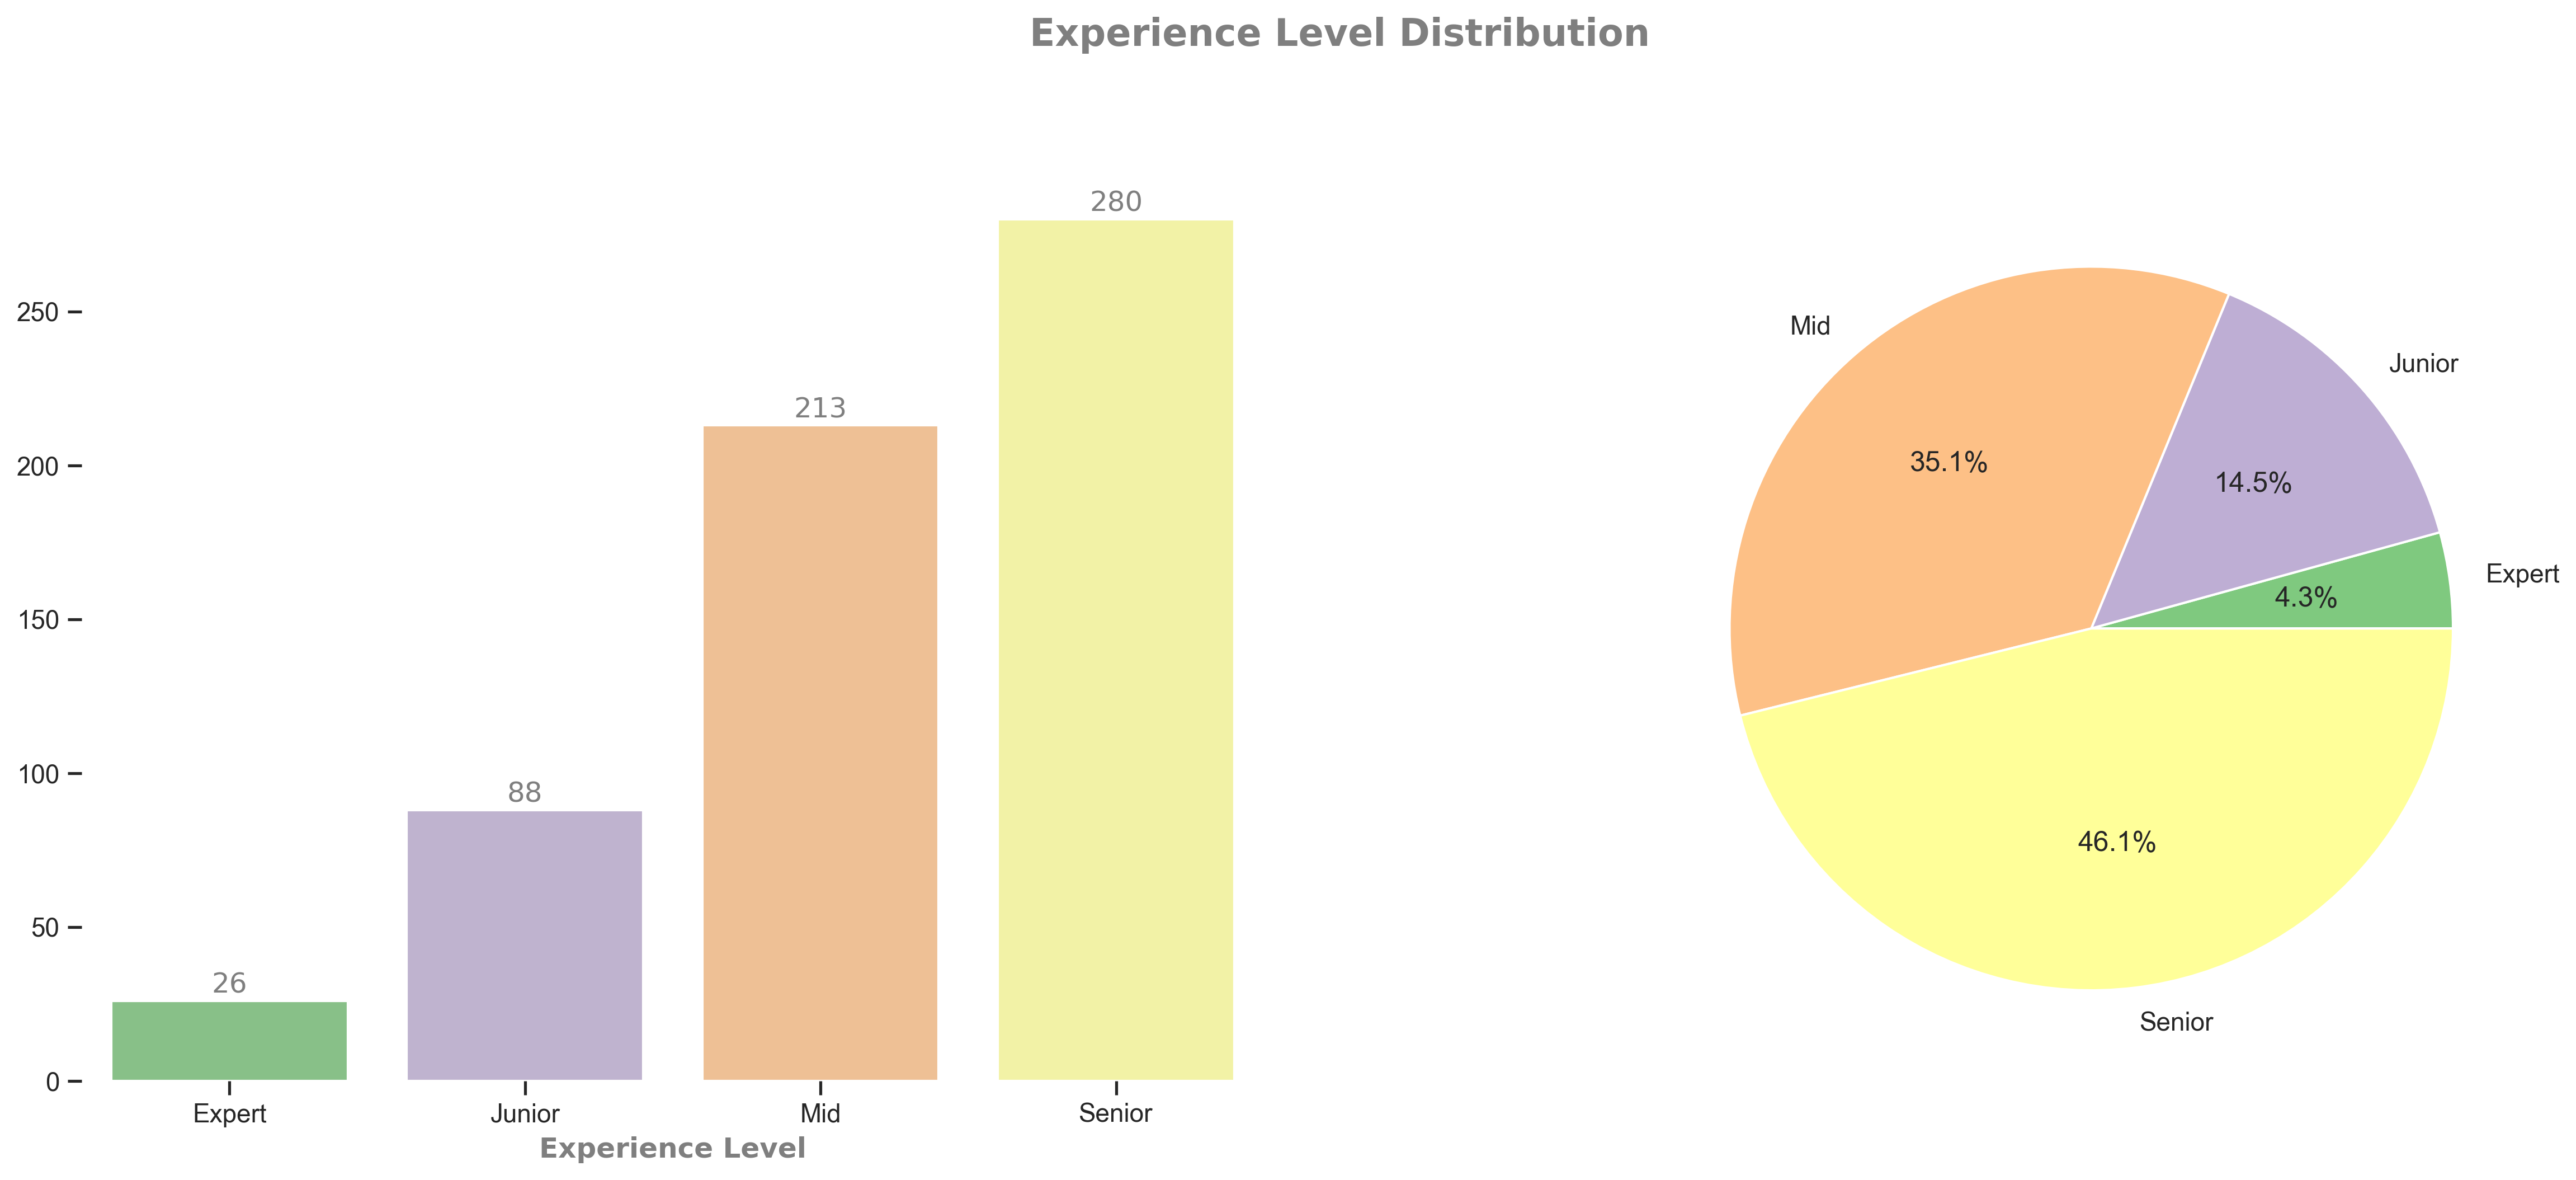

In [16]:
univariate_multi_plot(x="experience_level", xlabel="Experience Level")

* Number of **senior-level** employees are highest in the dataset. 
* Also, the number of **mid-level** employees is quite close to **senior-level**. 
* Meanwhile, the number of **junior-level** and **expert-level** employees is relatively low. 

<div id = 'employment_type'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.3  Employment Type
    </h3>
</div>

In [17]:
univariate_multi_plot(x="employment_type", xlabel="Employment Type", explode=(0.5, 0.3, 0.1, 0))

* Number of **full-time** employees is significantly higher than others. Approximately **96.9%** of the whole dataset.
* Number of **part-time** employees is very low. 
* Meanwhile, the number of **contract** and **freelance** employees is almost next to zero.


* **Possible Conclusion**: Almost all the data science jobs require you to be a full-time employee.

<div id = 'job_title'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.4  Job Title
    </h3>
</div>

findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica, Ariel'] not found. Falling back to DejaVu Sans.


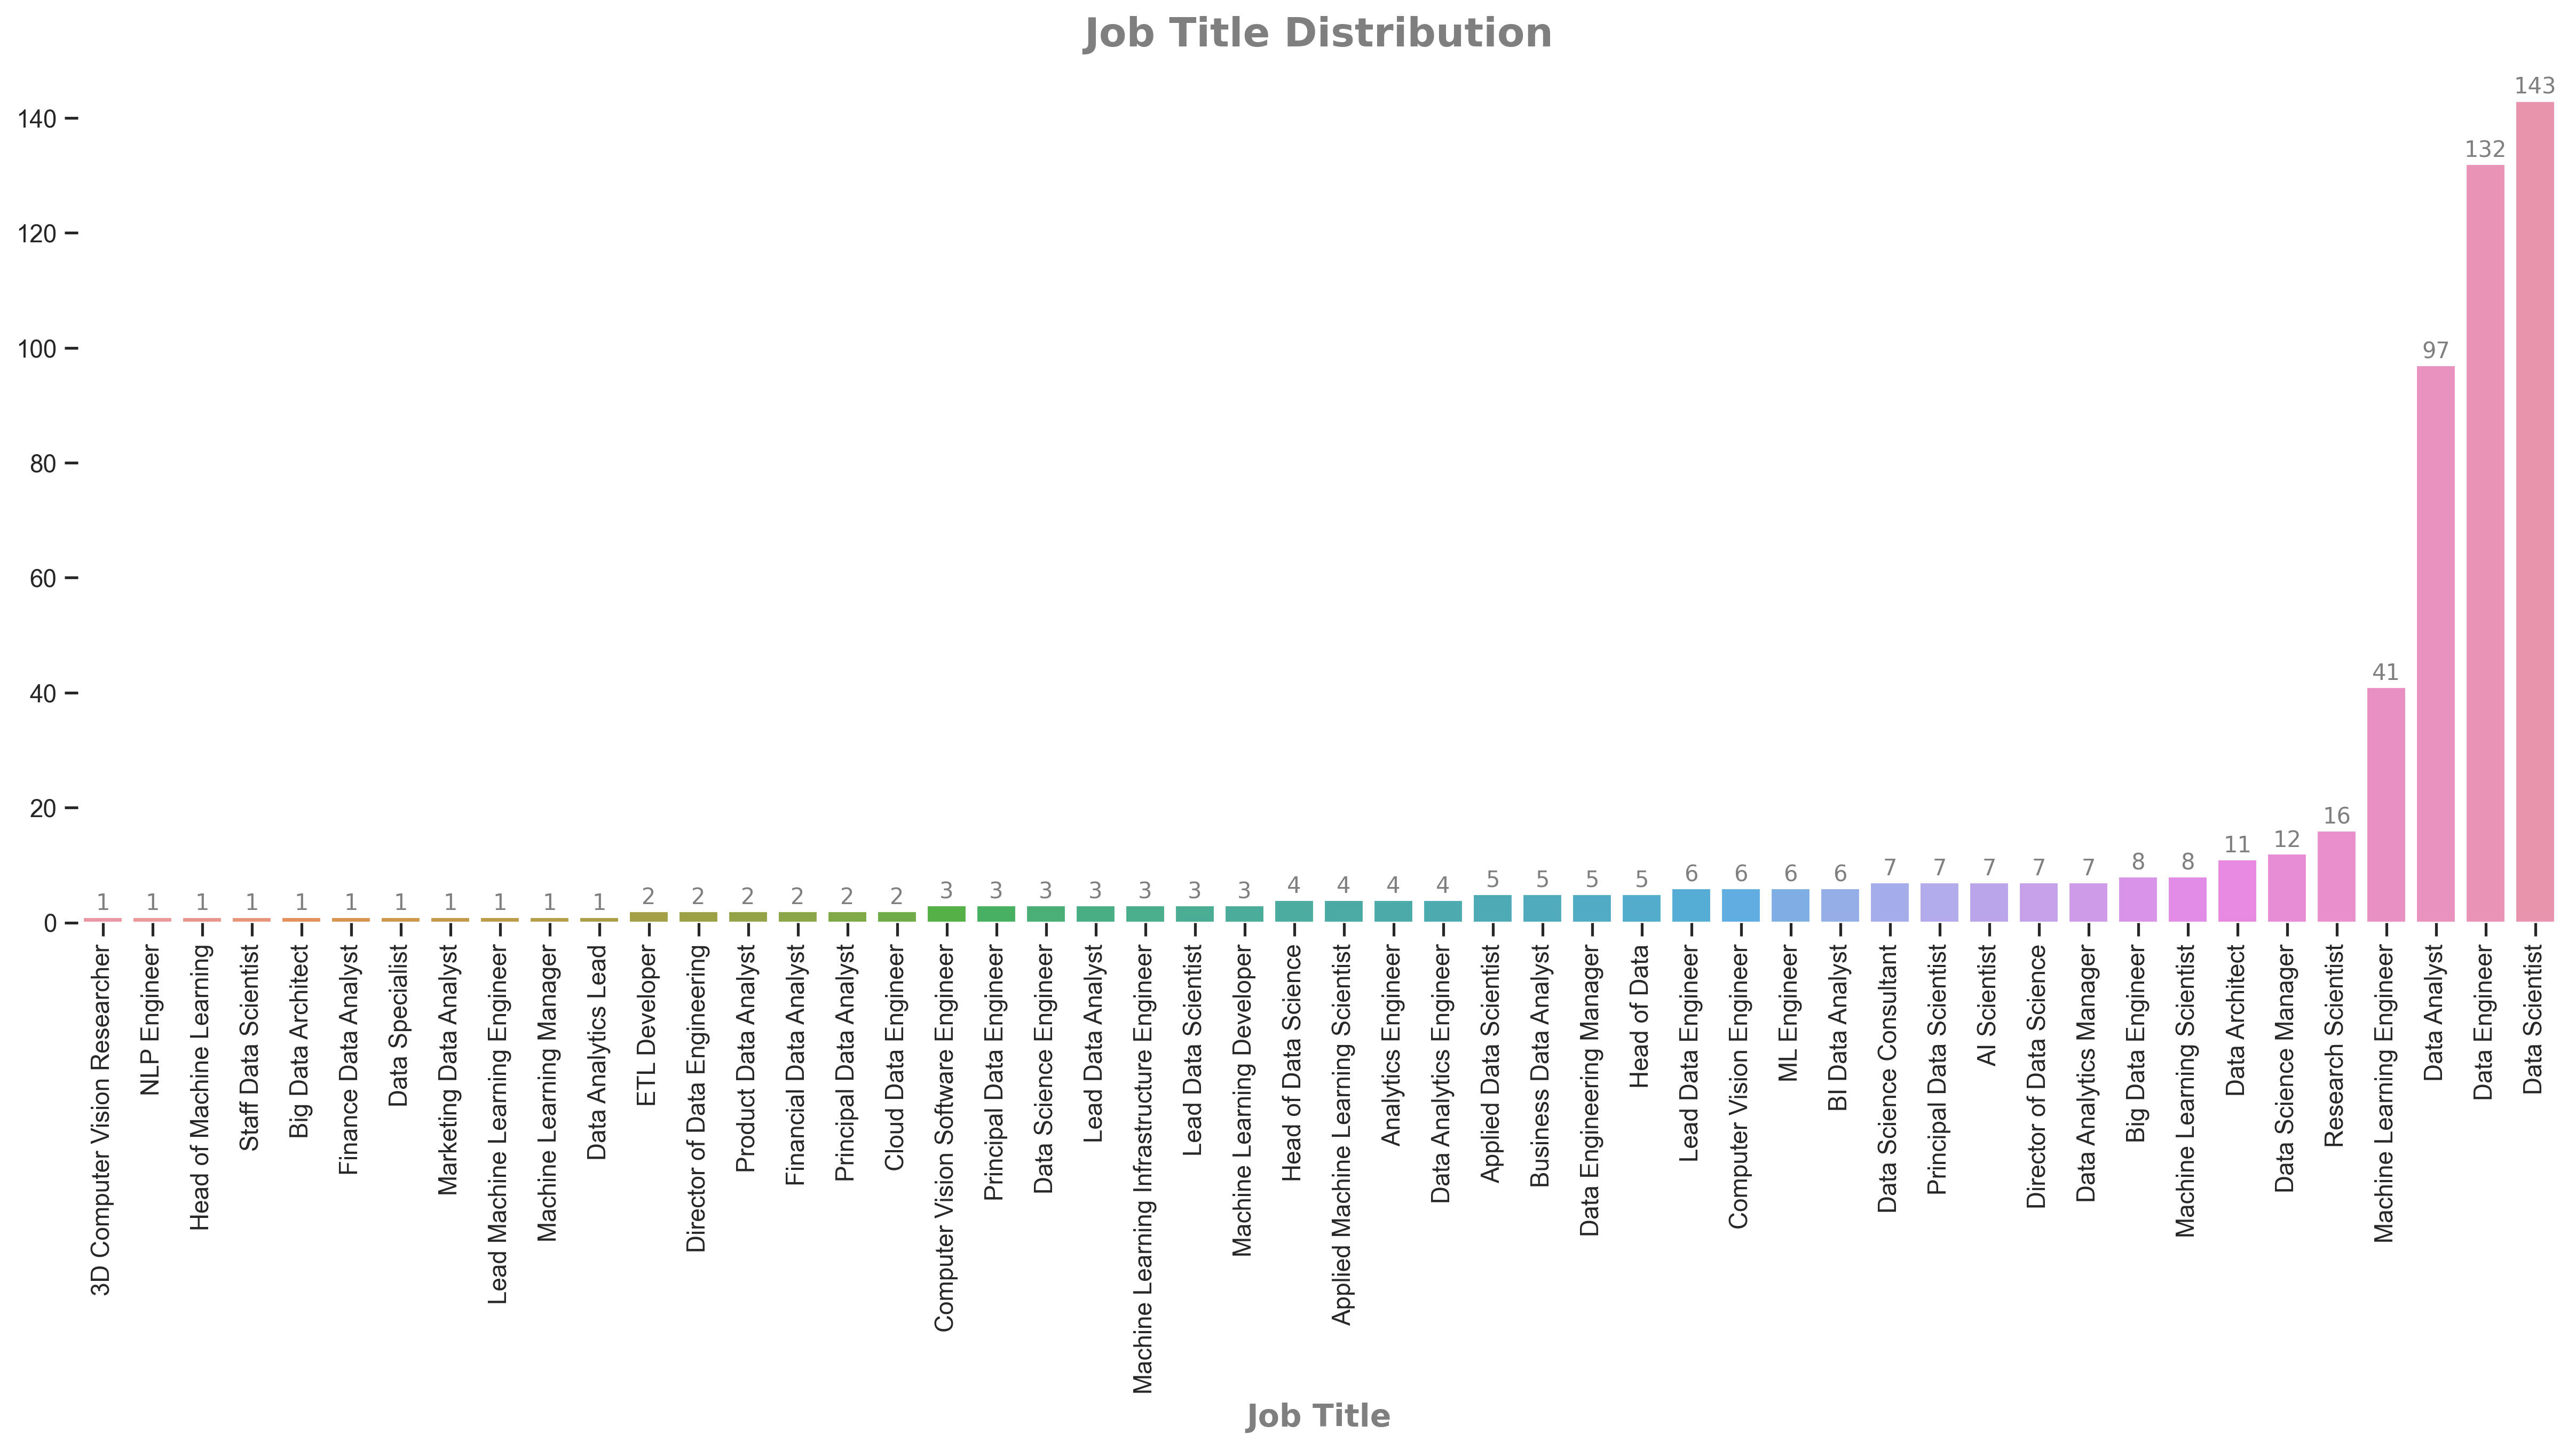

In [18]:
univariate_single_plot(x="job_title", xlabel="Job Title", rotation=90, bar_label=True)

* Number of **Data Scientist** and **Data Engineer** salary data are highest in the dataset.
* **Data Analyst** takes the third place.
* **Machine Learning Engineer** is the last significant title with approximately 40 entries.


* **Possible Conclusion**: Job market is mostly dominated by **Data Scientists**, **Data Engineers**, **Data Analysts**, and **Machine Learning Engineers**.

<div id = 'salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.5  Salary
    </h3>
</div>

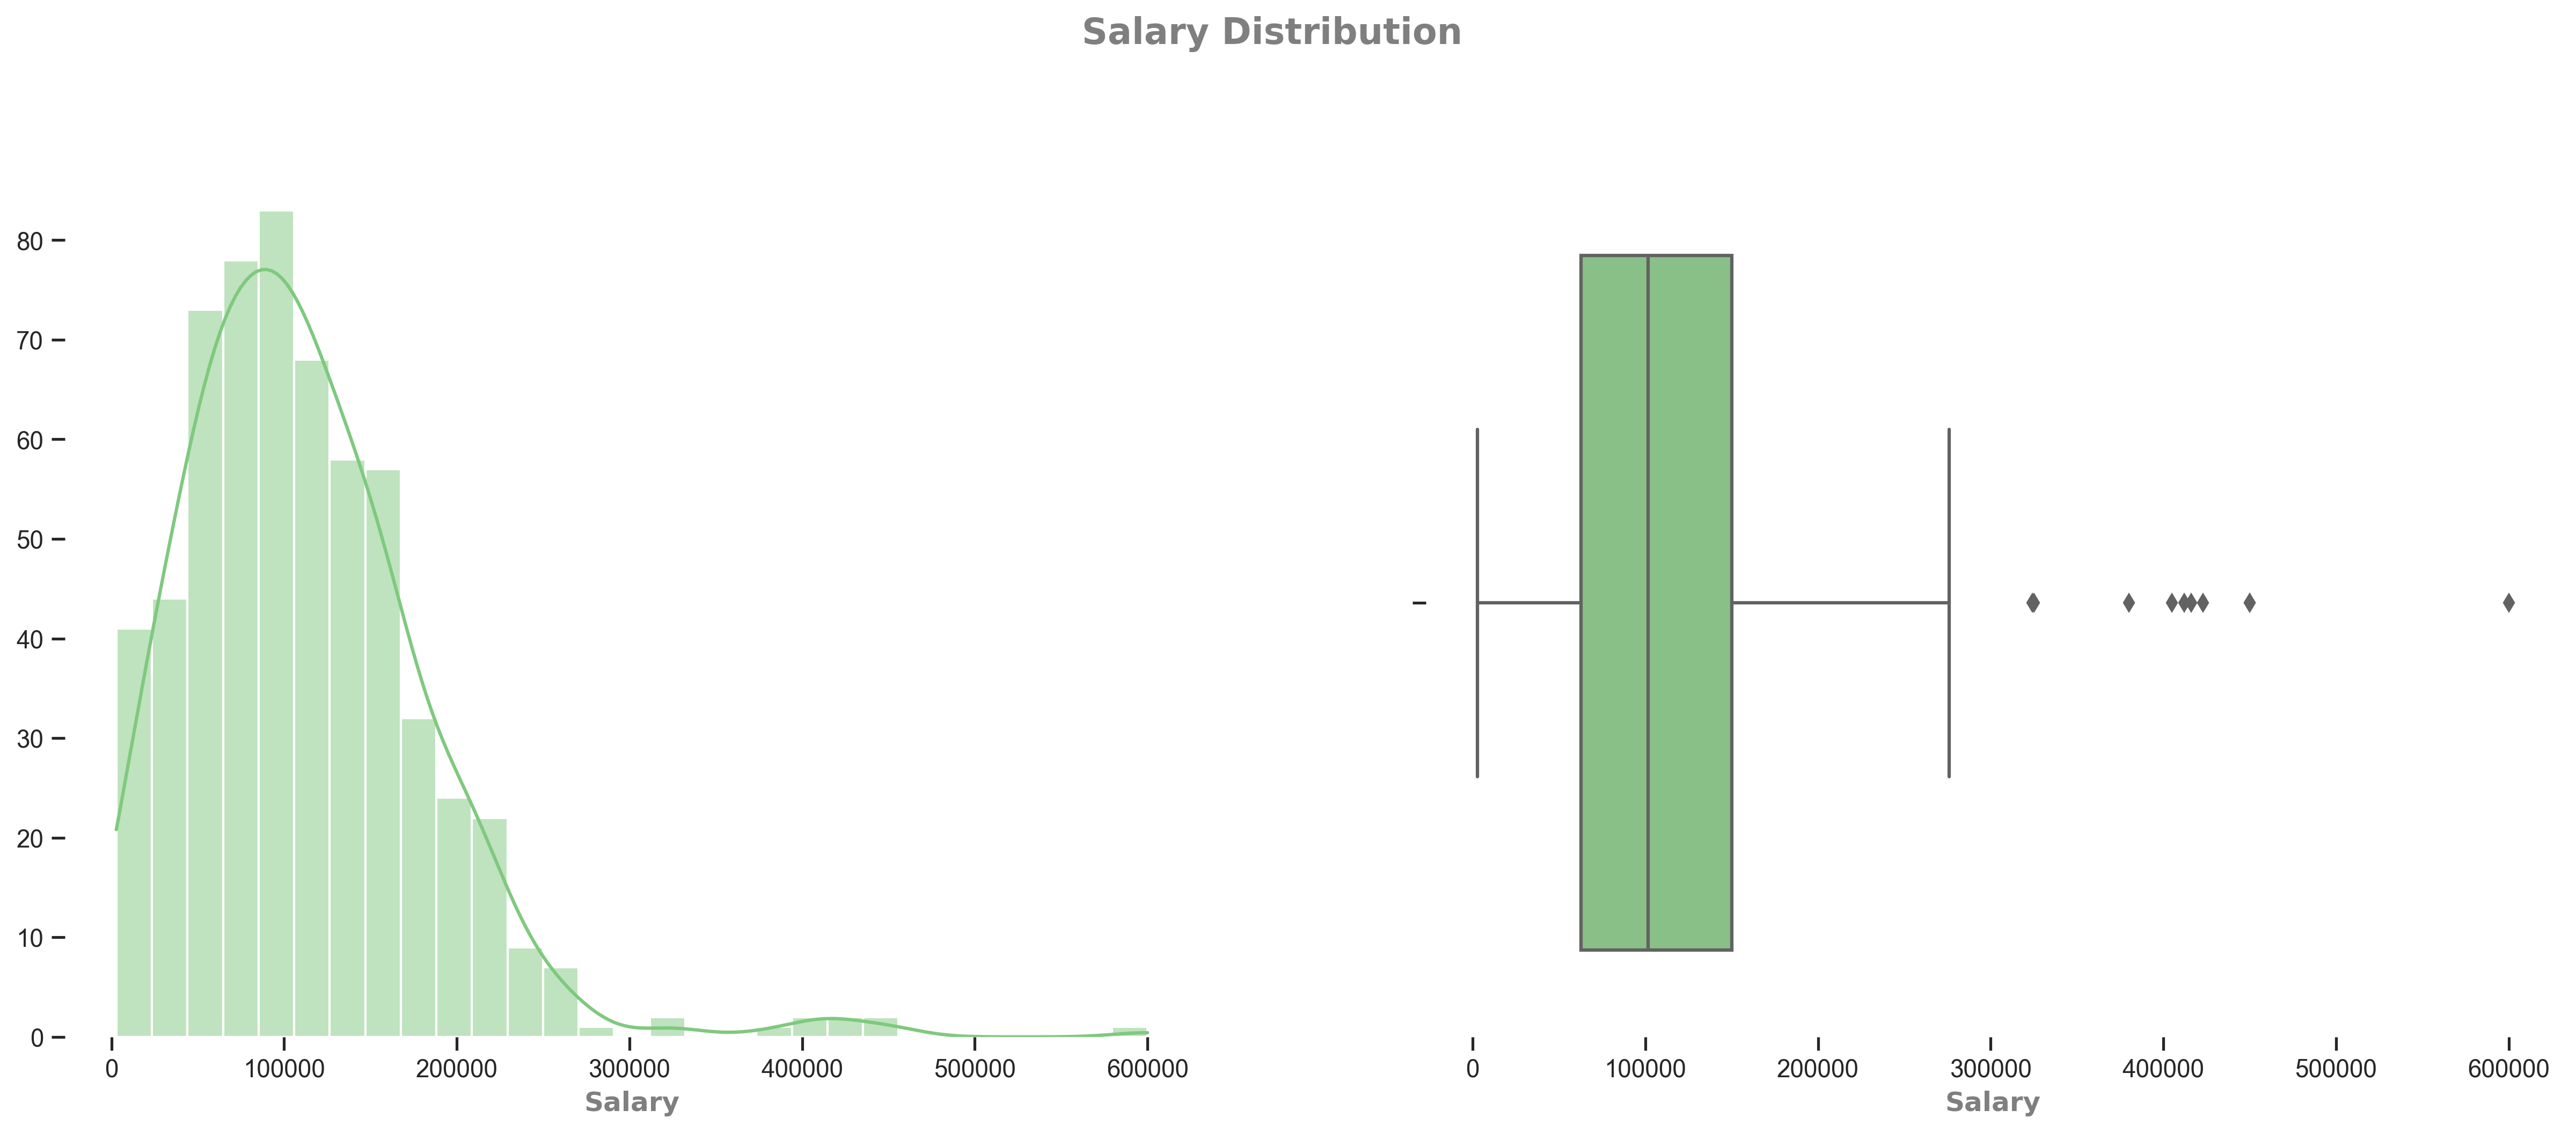

In [19]:
univariate_numerical_plot(x="salary", xlabel="Salary")

* By looking at the curve, we can say that most of the employees are getting paid around **100,000** USD. 
* Higher salaries are quite rare, especially over **300,000** USD.


I would like to look into the employees who earn more than **300,000** USD.

In [20]:
salaries[salaries["salary"] > 300000].sort_values("salary", ascending=False).reset_index(drop=True)

work_year experience_level employment_type  \
0       2021           Expert       Full-time   
1       2020              Mid       Full-time   
2       2021              Mid       Full-time   
3       2021              Mid       Full-time   
4       2021           Expert        Contract   
5       2020           Senior       Full-time   
6       2022           Senior       Full-time   
7       2022           Senior       Full-time   
8       2020           Expert       Full-time   
9       2022           Expert       Full-time   

                            job_title  salary employee_residence remote_ratio  \
0             Principal Data Engineer  600000                 US       Remote   
1                  Research Scientist  450000                 US      On-site   
2              Financial Data Analyst  450000                 US       Remote   
3  Applied Machine Learning Scientist  423000                 US       Hybrid   
4            Principal Data Scientist  416000                 US       Remote   
5                      Data Scientist  412000                 US       Remote   
6                 Data Analytics Lead  405000                 US       Remote   
7              Applied Data Scientist  380000                 US       Remote   
8            Director of Data Science  325000                 US       Remote   
9                       Data Engineer  324000                 US       Remote   

  company_location company_size  
0               US        Large  
1               US       Medium  
2               US        Large  
3               US        Large  
4               US        Small  
5               US        Large  
6               US        Large  
7               US        Large  
8               US        Large  
9               US       Medium

* They **all** live in the **United States** and work for **US-based** companies. 
* **80%** of them are working **remote**. 
* **Most** of them are working at **large** companies.
* **90%** of them are **full-time** employees.
* There are no **junior**-level employees who earn more than **300,000** USD.


* **Possible Conclusion**: If we get a data science job right now, we will most likely be paid around **100,000** USD. Only in the **United States** can we earn extremely high wages.

<div id = 'employee_residence'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.6  Employee Residence
    </h3>
</div>

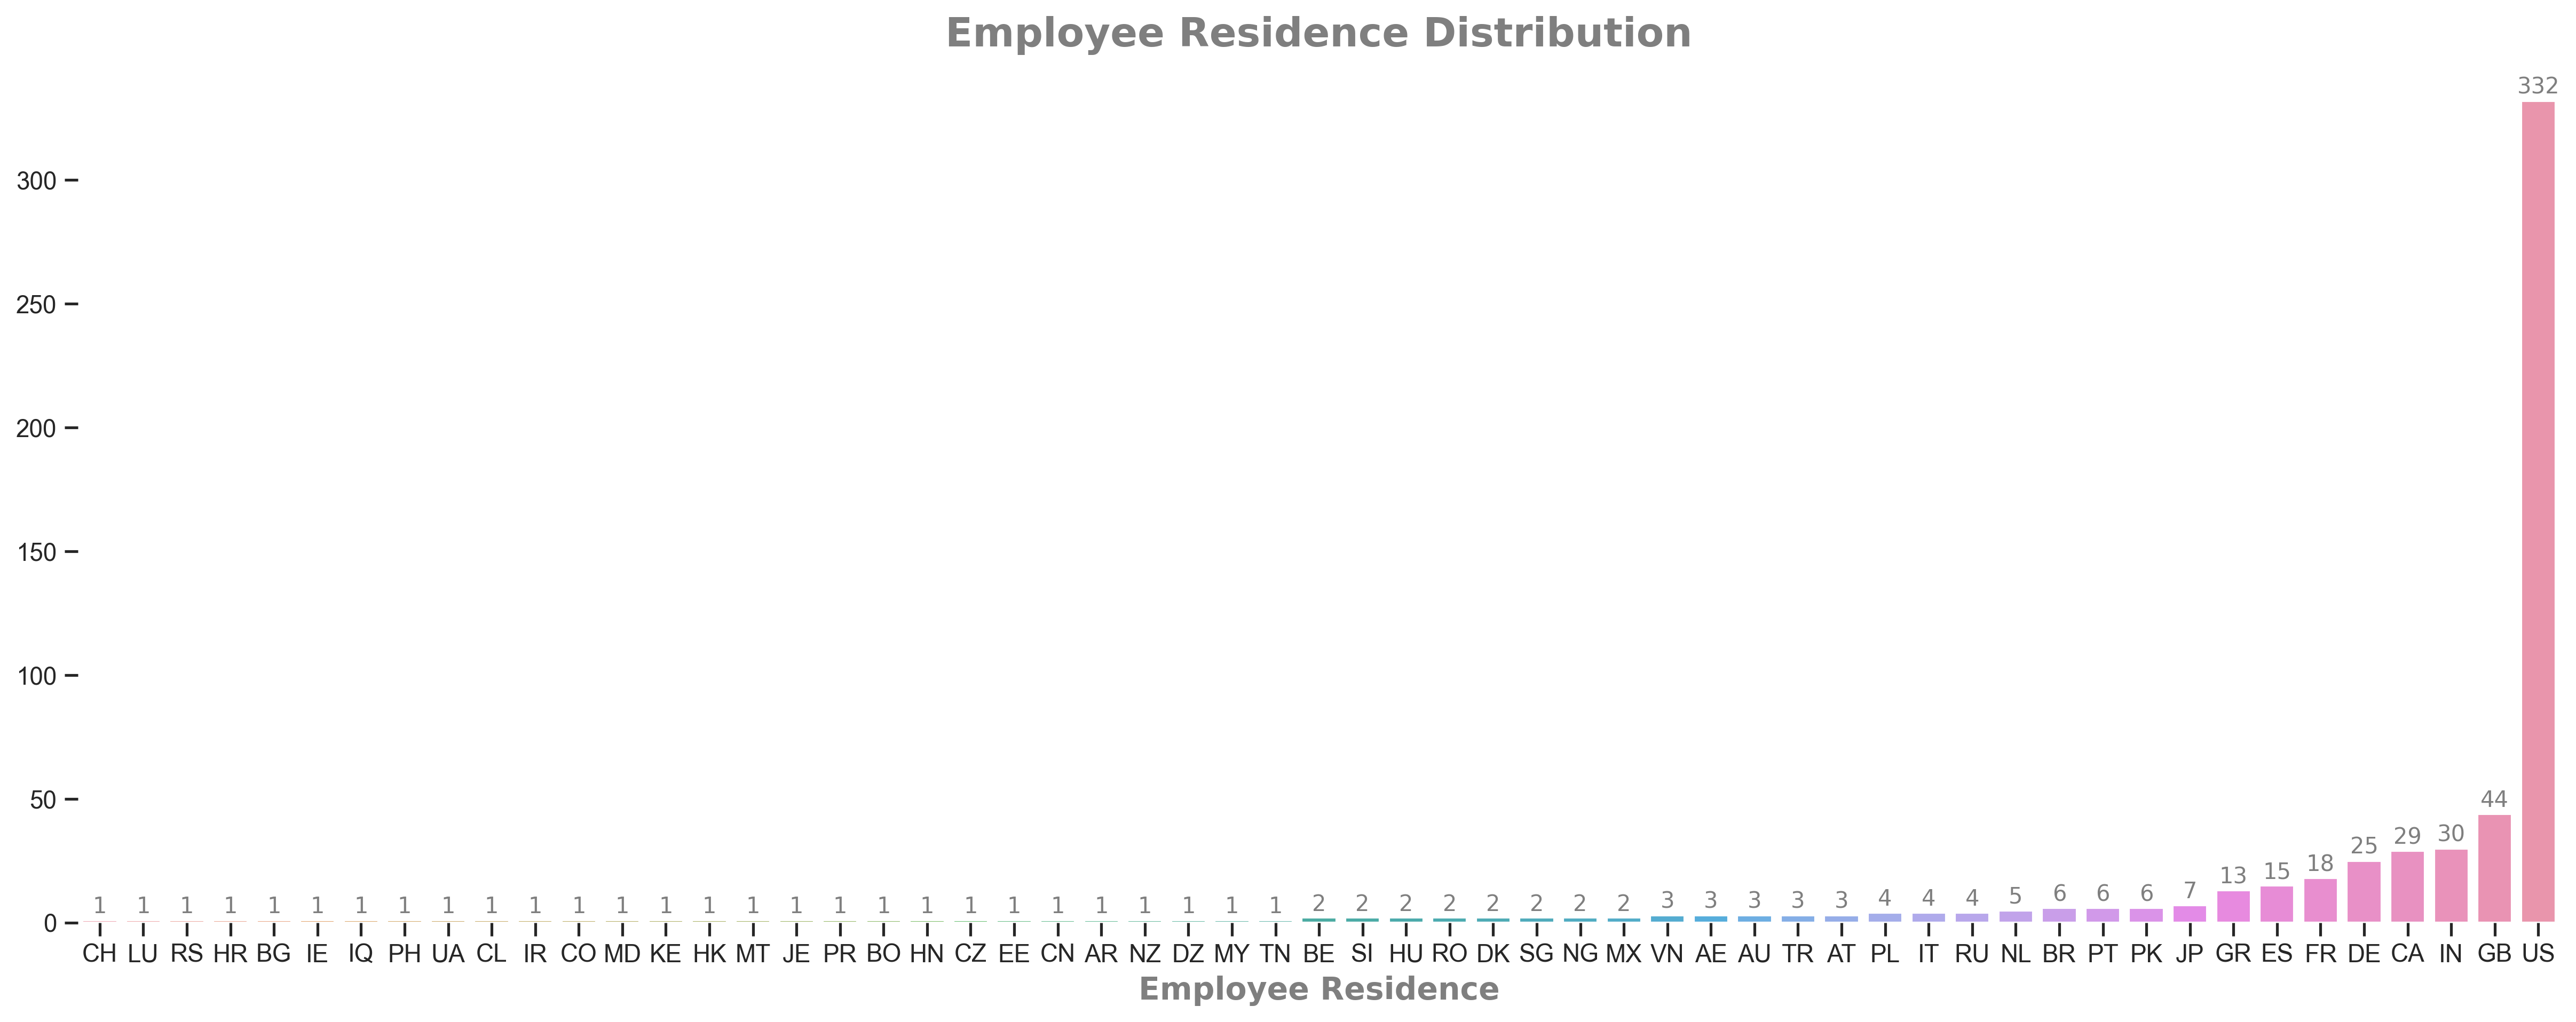

In [21]:
univariate_single_plot(x="employee_residence", xlabel="Employee Residence", bar_label=True)

* The **United States** clearly dominates the competition with over **300** data entries.
* **Great Britain**, **Canada**, **India**, and **Germany** follows the **United States**, with less than **50** entries.
* Most of the countries are next to zero.


* **Possible Conclusion**: Data science jobs are much more popular and common in the United States than in any other country.


<div id = 'remote_ratio'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.7  Remote Ratio
    </h3>
</div>

In [22]:
univariate_multi_plot(x="remote_ratio", xlabel="Remote Ratio")

* **Remote** jobs are more popular by far with approximately **62.8%** share.
* **Hybrid** and **On-site** jobs almost have the same popularity.


* **Possible Conclusion**: This result may be due to the covid pandemic. It is known that remote jobs are increasing because of the pandemic.
* Later on, I will analyze the **remote work ratio** and **work year** at the same time to see if there is a correlation as I suspected.

<div id = 'company_location'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.8  Company Location
    </h3>
</div>

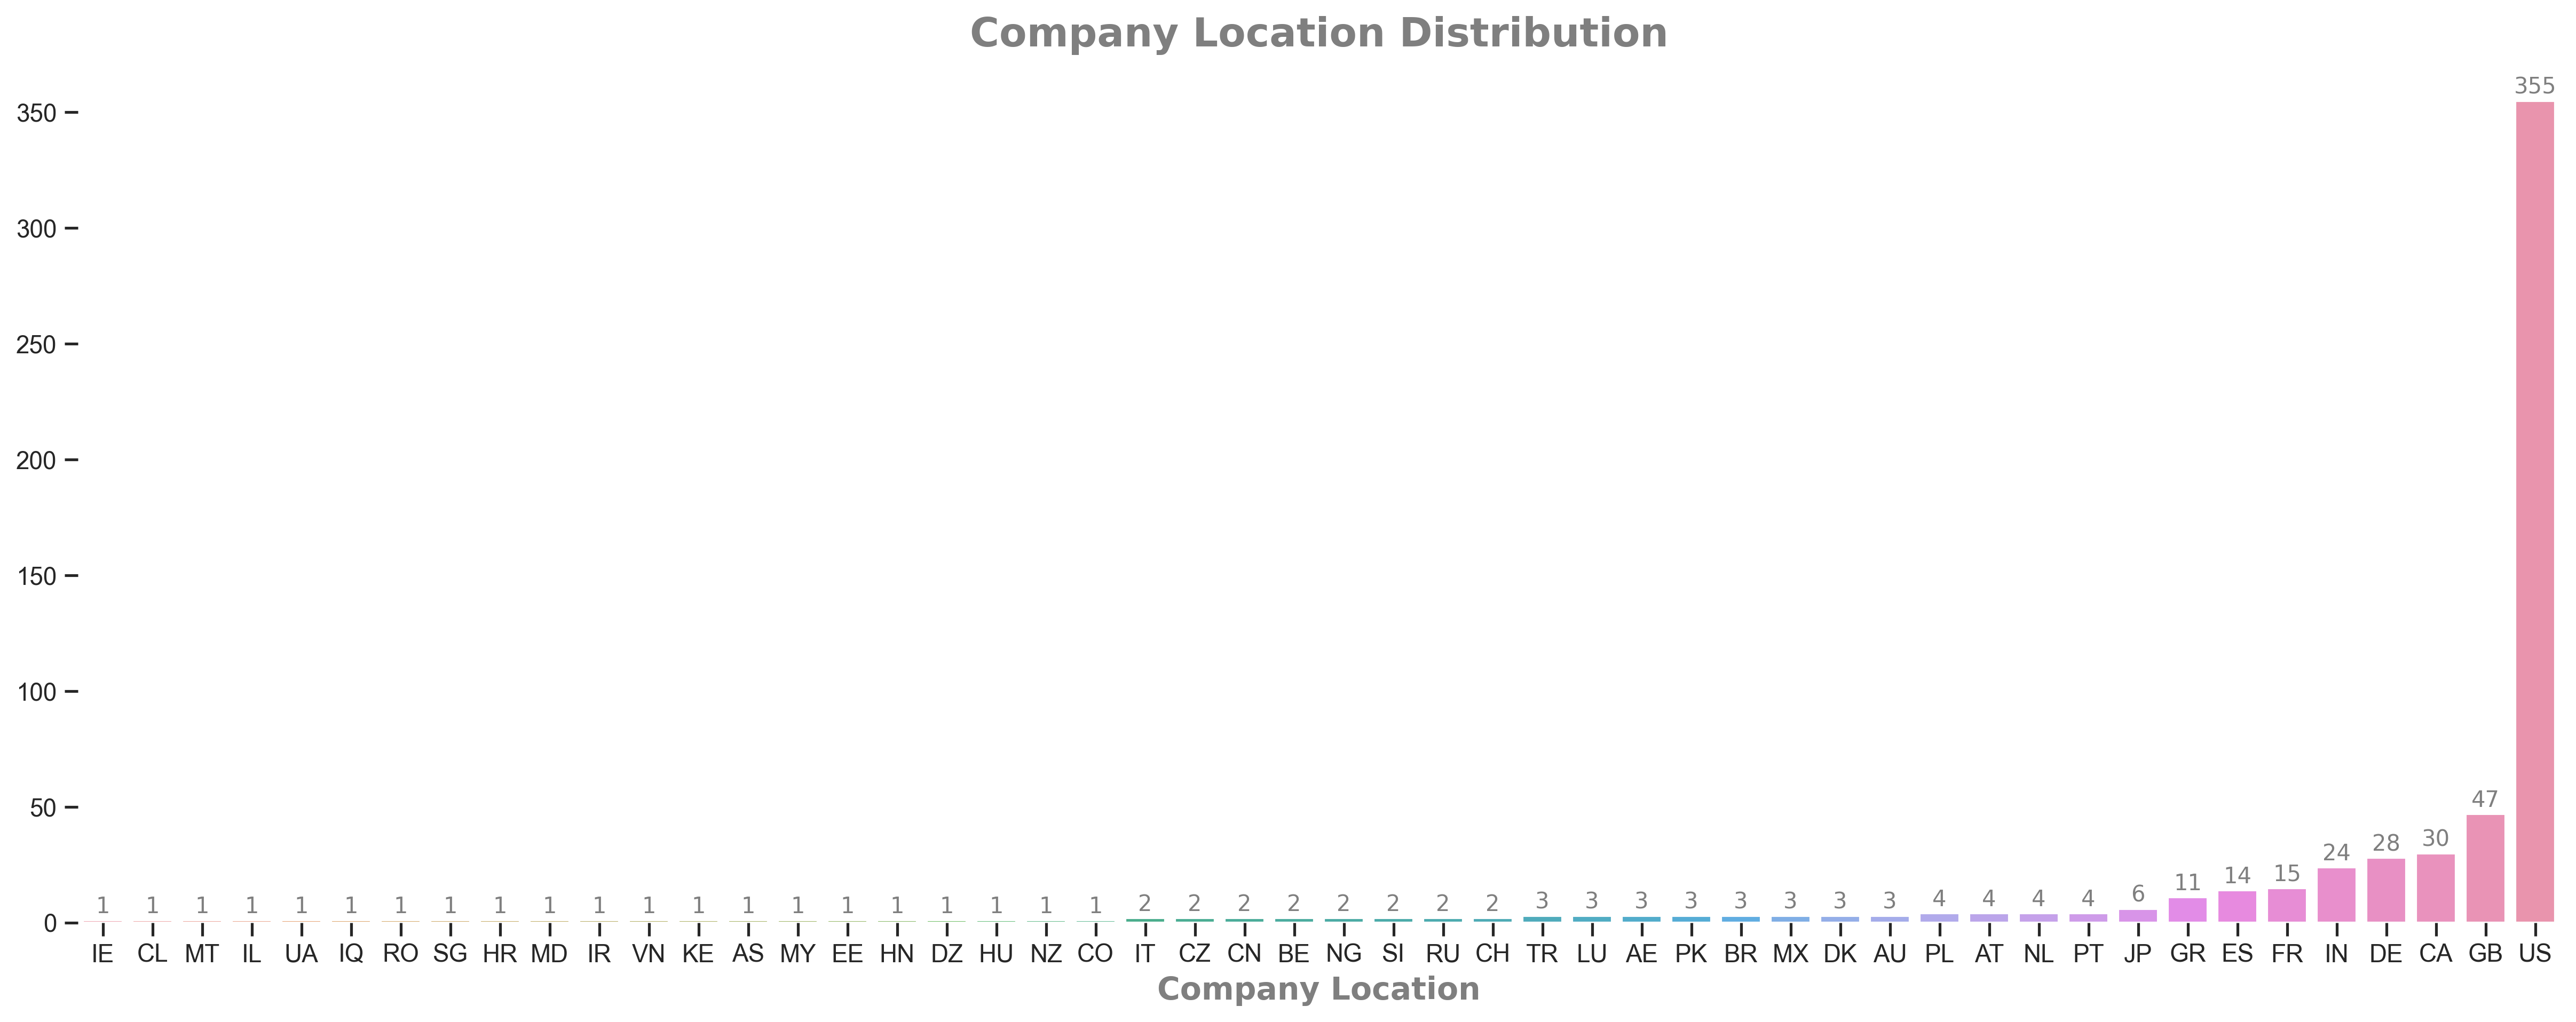

In [23]:
univariate_single_plot(x="company_location", xlabel="Company Location", bar_label=True)

* The result is extremely similar to **employee residence** distribution.
* The **United States** dominates every other country by far.
* **Great Britain**, **Canada**, **India**, and **Germany** are following the **United States**.


* **Possible Conclusion**: Similar to employee residence analysis, most of the employers (companies) are **US** based.

<div id = 'company_size'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1.9  Company Size
    </h3>
</div>

In [24]:
univariate_multi_plot(x="company_size", xlabel="Company Size")

* **Medium size** companies take the lead with approximately **53.7%** share.
* Almost **1/3** of the data science jobs are posted by **Large size** companies.


* **Possible Conclusion**: I assume that, in general, the number of **large size** companies is less than **medium size** companies. The difference in results between **medium size** and **large size** companies may be due to this reason. Meanwhile, **small size** companies may not require a data scientist or any data science-related employee.

<div id = 'multivariate-analysis'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2 Multivariate Analysis
    </h3>
</div>
Now, we will try to analyze features as pairs to understand the relationships between them.

In [25]:
## Helper Functions

def multivariate_plot(df=salaries, x=None, hue=None, xlabel=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = df.groupby(x).mean()["salary"].sort_values().reset_index().copy()
    sns.barplot(data=df, x=x, y="salary", hue=hue, ci=None)
    plt.ylabel(ylabel="Salary (in USD)", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'Salaries by {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, fontname="Helvetica, Ariel", 
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()
    
    
def multivariate_count_plot(df=salaries, x=None, hue=None, xlabel=None, hue_label=None, rotation=None, 
                            legend=False, bar_label=False, convert=False):
    fig ,ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, hue=hue)
    plt.ylabel(ylabel="", size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'{hue_label} vs. {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if bar_label:
        for i in range(df[hue].nunique()):
            ax.bar_label(ax.containers[i], label_type='edge', size=10, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    if legend:
        if convert:
            country_labels = coco.CountryConverter().convert(df[hue].unique(), to='name_short')
            plt.legend(title=hue_label, labels=country_labels)
        else:
            plt.legend(title=hue_label)
    sns.despine(bottom=True, left=True)
    plt.show()

<div id = 'work_year-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.1 Work Year and Salary
    </h3>
</div>

In [26]:
multivariate_plot(x="work_year", xlabel="Work Year")

In [27]:
diff_2022 = salaries.groupby("work_year")["salary"].mean().loc[2022] - salaries.groupby("work_year")["salary"].mean().loc[2021]
diff_2022_in_percentage = diff_2022 / salaries.groupby("work_year")["salary"].mean().loc[2021] * 100 
print(f'2021-2022 average salary increase: {diff_2022_in_percentage:.2f}%')

2021-2022 average salary increase: 24.70%


* Salaries increased in **2021** but not that much.
* Salaries increased significantly in **2022** with approximately **24.70%**.


* **Possible Conclusion**: Data science jobs are becoming more important; therefore, salaries are increasing over the years. This may be due to the fact that companies are learning what they can do with their data. For example; increasing efficiency, cutting costs, etc.

<div id = 'experience_level-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.2  Experience Level and Salary
    </h3>
</div>

In [28]:
multivariate_plot(x="experience_level", xlabel="Experience Level")

In [29]:
salaries_by_exp = salaries.groupby("experience_level")["salary"].mean()
ex_se_diff = (salaries_by_exp.loc["Expert"] - salaries_by_exp.loc["Senior"]) 
se_mi_diff = (salaries_by_exp.loc["Senior"] - salaries_by_exp.loc["Mid"]) 
mi_en_diff = (salaries_by_exp.loc["Mid"] - salaries_by_exp.loc["Junior"]) 
print(f'Expert-Senior Difference: {int(ex_se_diff)} USD ({ex_se_diff / salaries_by_exp.loc["Senior"] * 100:.2f}%)')
print(f'Senior-Mid Difference: {int(se_mi_diff)} USD ({se_mi_diff / salaries_by_exp.loc["Mid"] * 100:.2f}%)')
print(f'Mid-Junior Difference: {int(mi_en_diff)} USD ({mi_en_diff / salaries_by_exp.loc["Junior"] * 100:.2f}%)')

Expert-Senior Difference: 60774 USD (43.84%)
Senior-Mid Difference: 50621 USD (57.53%)
Mid-Junior Difference: 26352 USD (42.75%)


* Salary and Experience level have a positive correlation. Which means, employees with higher experience get higher salaries.
* Salary increase between **Mid-level** and **Entry-level** positions are lowest by far (not in percentage).


* **Possible Conclusion**: If an employee gets more experienced, he/she will earn more money. Also, going from entry level to mid-level does not increase salary too much. But if an employee keeps working and becoming more experienced, the salary increase comes much more drastic. This also can be interpreted as, if you are a senior engineer, you can ask for a raise with more confidence because of the job market.

<div id = 'employment_type-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.3  Employment Type and Salary
    </h3>
</div>

In [30]:
multivariate_plot(x="employment_type", xlabel="Employment Type")

In [31]:
salaries_by_empl_type = salaries.groupby("employment_type")["salary"].mean()
ft_pt_difference = salaries_by_empl_type.loc["Full-time"] - salaries_by_empl_type.loc["Part-time"]
print(ft_pt_difference / salaries_by_empl_type.loc["Part-time"] * 100)

243.10963889040593


* Employees that work with a **contract** earn the most by far. 
* **Full-time** employees are getting paid almost **three times** of what **part-time** employees are getting. Results are surprising for me because, full-time usually means working twice as much as part-time. That is why, I was expecting approximately a **100%** difference, but here, we have a **243%** difference.


* **Possible Conclusion**: Working with a contract is the best option by far because of the extremely high salaries. For the full-time/part-time difference, we may interpret this as, the companies does not value their part-time employees. Even though they are working 20hrs/wk (assumption), salaries are way lower than full-time, which is 40hrs/wk (assumption). Lastly, in this current job market, I think working full-time at a company is a better choice compared to working by him/herself as freelance.



<div id = 'job_title-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.4 Job Title and Salary
    </h3>
</div>

In [32]:
multivariate_plot(x="job_title", xlabel="Job Title", rotation=90, bar_label=False)

By looking at this graph, I have some suspicions about the accuracy of the results. Some job titles such as **Data Analytics Lead** and **Principal Data Engineer** earning more than 3 million USD per year. Maybe there is insufficient data for some job titles. If only one entry is available with 3 million USD, this means the average is also 3 million, which does not really reflect reality. I will check if there are any job titles with single entry.

In [33]:
single_entries = pd.DataFrame(data=salaries["job_title"].value_counts(ascending=True).head(10))
single_entries.columns = ["Number of Salary Data"]
single_entries.index.names = ["Job Title"]
single_entries

Number of Salary Data
Job Title                                            
3D Computer Vision Researcher                       1
NLP Engineer                                        1
Head of Machine Learning                            1
Staff Data Scientist                                1
Big Data Architect                                  1
Finance Data Analyst                                1
Data Specialist                                     1
Marketing Data Analyst                              1
Lead Machine Learning Engineer                      1
Machine Learning Manager                            1

* In fact, **Data Analytics Lead** has a single data entry which may give an unrealistic outcome. Surprising part is that, the **Principal Data Engineer** (which was the other title I was suspicious about) does have more than a single entry.
* I will filter the titles that have a single entry (just to be safe).

In [34]:
salaries_mult_entry = salaries.groupby("job_title").filter(lambda x: len(x) > 1)

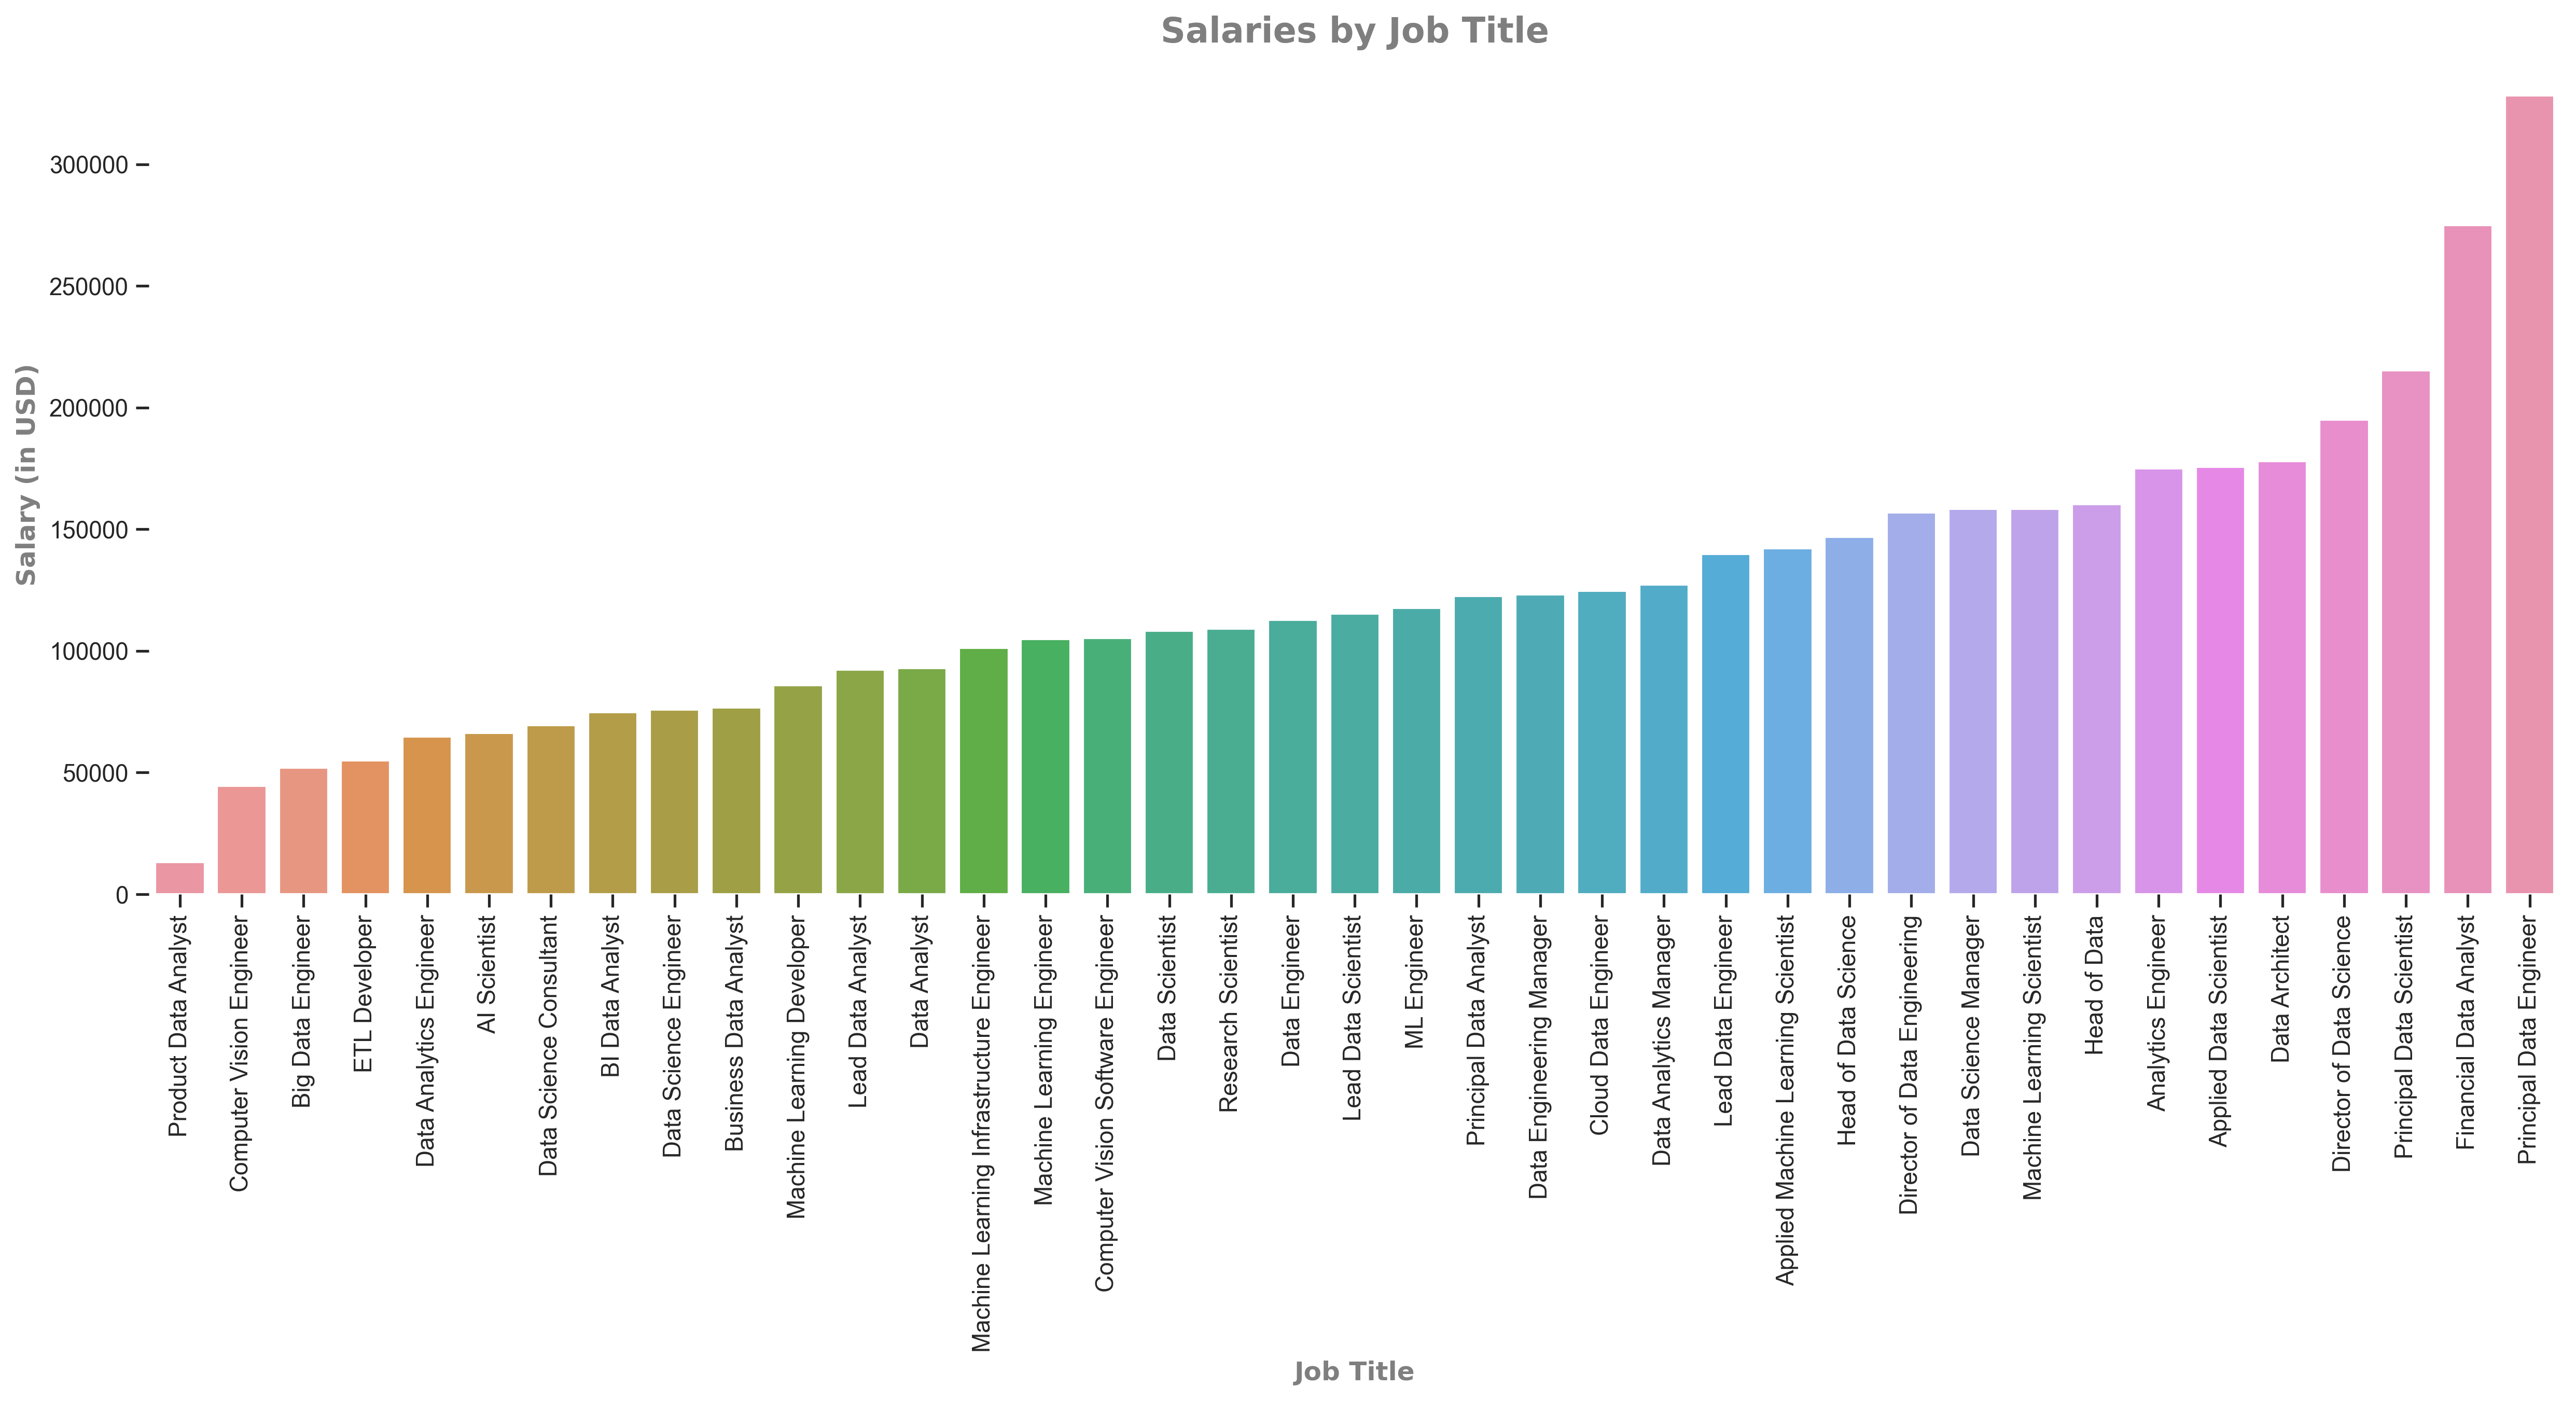

In [35]:
multivariate_plot(df=salaries_mult_entry, x="job_title", xlabel="Job Title", rotation=90, bar_label=False)

* **Principal Data Engineers** and **Financial Data Analysts** are earning the most with over 2.5 million USD.
* **Product Data Analysts** are earning the least.
* I am still skeptical about these three titles. Two of them earning too much and one of them earning too little. I want to analyze them further.

In [36]:
sus_titles = ["Principal Data Engineer", "Financial Data Analyst", "Product Data Analyst"]
sus_title_salaries = salaries_mult_entry[salaries_mult_entry["job_title"].isin(sus_titles)]
sus_salaries = pd.DataFrame(sus_title_salaries.groupby("job_title")["company_location"].value_counts())
sus_salaries.columns = ["Number of Salary Data"]
sus_salaries.index.names = ["Job Title", "Company Location"]
sus_salaries

Number of Salary Data
Job Title               Company Location                       
Financial Data Analyst  US                                    2
Principal Data Engineer US                                    3
Product Data Analyst    HN                                    1
                        IN                                    1

* Both **Financial Data Analyst** and **Principal Data Engineer** salaries are based in **US**. Meanwhile, **Product Data Analyst** data comes from **Honduras** and **India**. This may be the reason behind the salary difference. I will check the average salaries in **US**, **IN**, and **HN** to prove my point.

In [37]:
in_and_us_salaries = salaries[salaries["company_location"].isin(["US", "IN", "HN"])]

In [38]:
multivariate_plot(df=in_and_us_salaries, x="company_location", xlabel="Company Location")

I believe that my assumptions were correct. Average salary in **US** is significantly higher than, both **India** and **Honduras** combined. That also means, there is nothing wrong with the data.


* **Possible Conclusion**: **Principal Data Engineer** and **Financial Data Analyst** are earning the most. **Product Data Analyst** earning the least. But titles are correlated with countries as well. So, giving a definite opinion,  just by looking at the job titles may not be a good idea.

<div id = 'employee_residence-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.5  Employee Residence and Salary
    </h3>
</div>

In [39]:
multivariate_plot(x="employee_residence", xlabel="Employee Residence", bar_label=False)

After what happened in job title analysis, I will check the number of salary data for each country. There may be a country with a single entry which does not reflect reality.


In [40]:
sus_employee_res = pd.DataFrame(salaries["employee_residence"].value_counts(ascending=True).head(10))
sus_employee_res.columns = ["Number of Salary Data"]
sus_employee_res.index.names = ["Country Code"]
sus_employee_res

Number of Salary Data
Country Code                       
CH                                1
LU                                1
RS                                1
HR                                1
BG                                1
IE                                1
IQ                                1
PH                                1
UA                                1
CL                                1

There are a lot of countries with a single entry. I prefer to filter these countries. 
Even though, I will be filtering so many countries, but I think this is the best approach in this situation. Because, I believe that a single entry is not reliable.

In [41]:
salaries_mult_empl_entry = salaries.groupby("employee_residence").filter(lambda x: len(x) > 1)

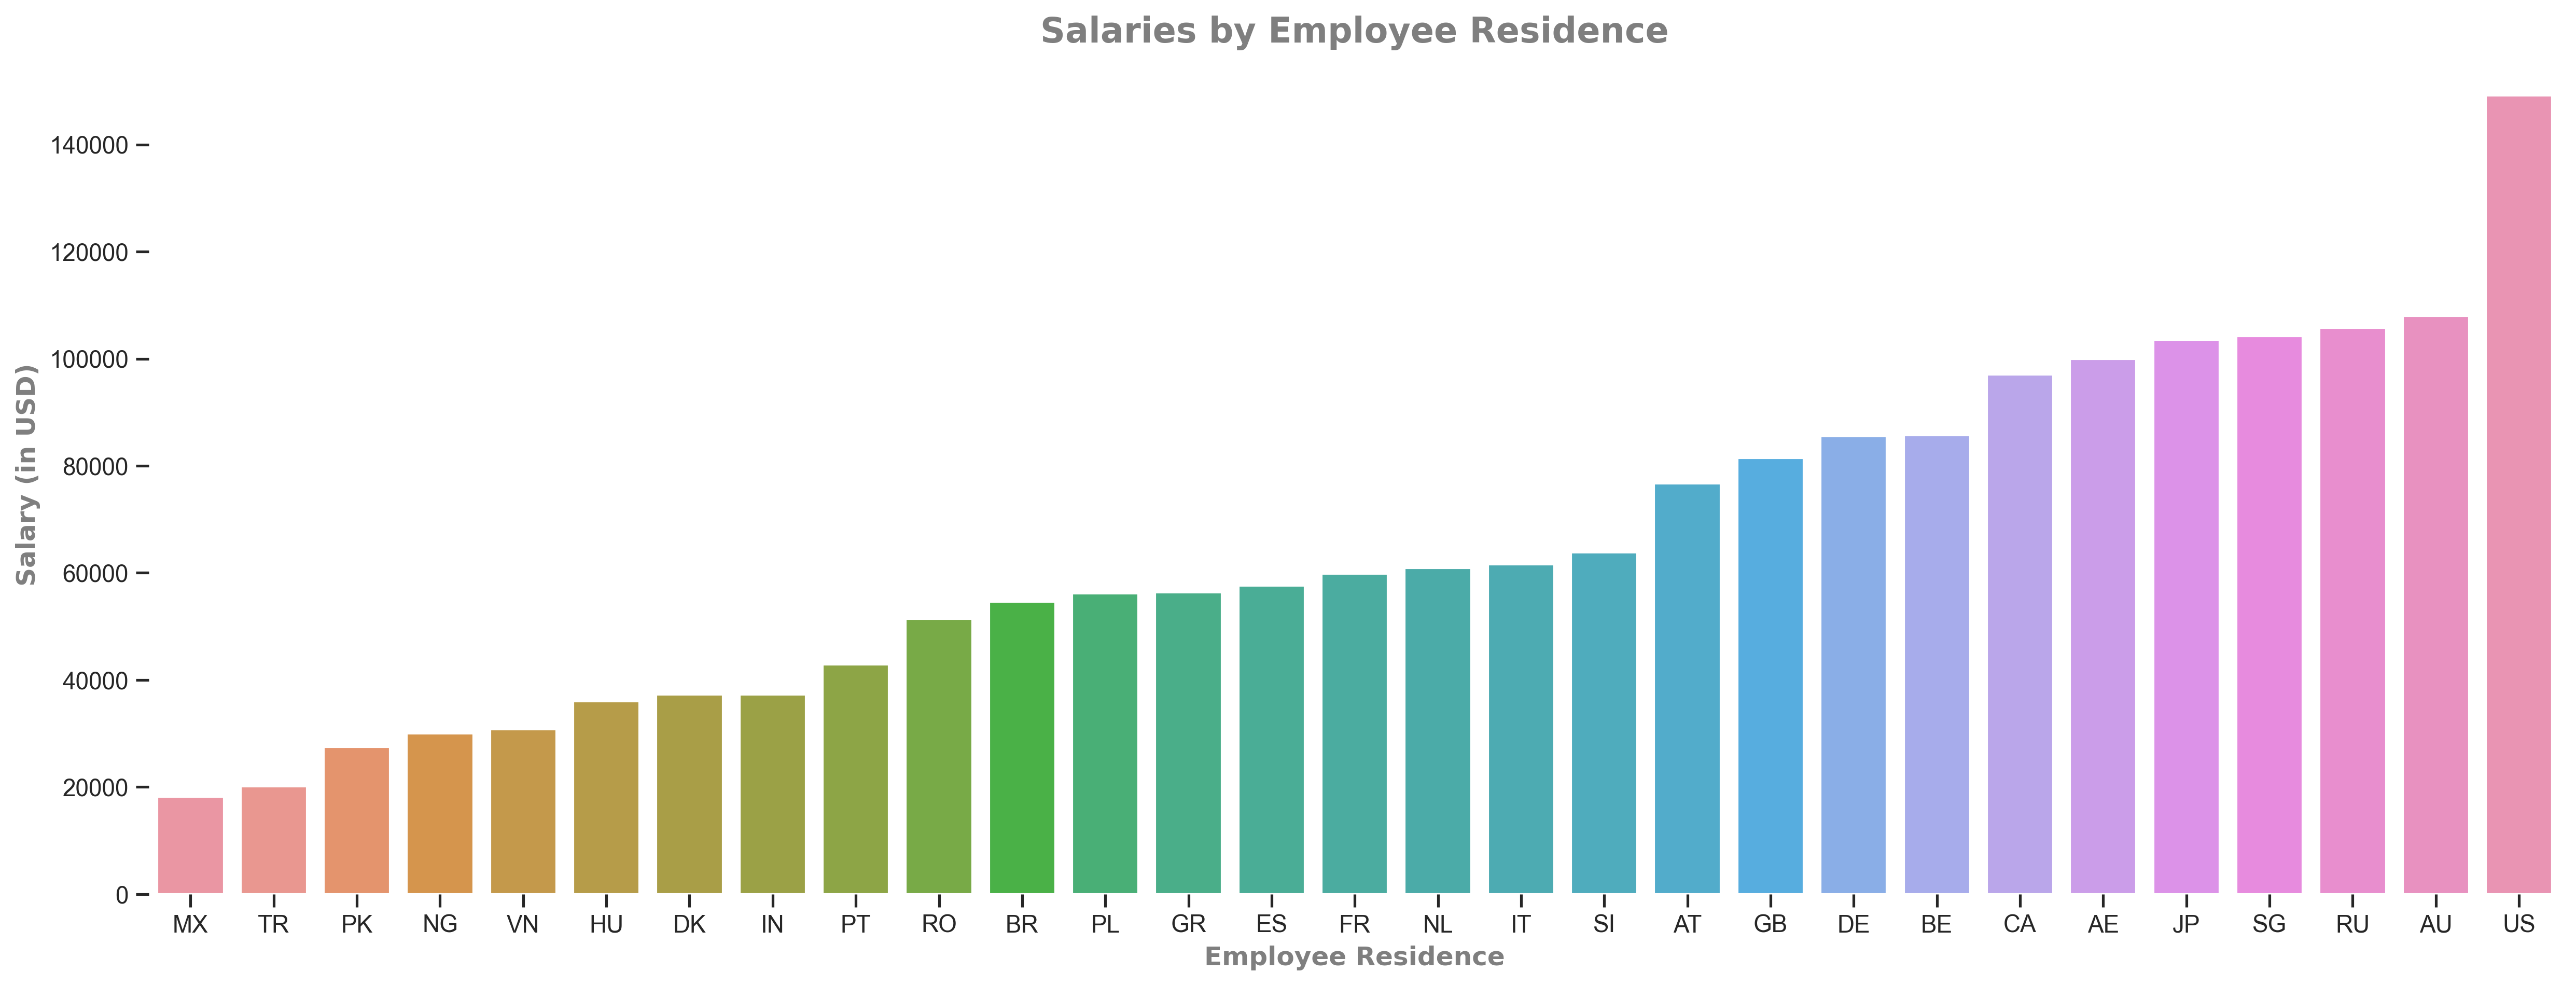

In [42]:
multivariate_plot(df=salaries_mult_empl_entry, x="employee_residence", xlabel="Employee Residence", bar_label=False)

Now it looks more realistic and reliable. 
* Employees living in the **US**, earning the most with **over 140k** USD.
*  **Japan**, **United Arab Emirates**, **Canada**, **Russia**, **Singapore**, and **Australia** are really close. Employees that are living in these countries earn **slightly over 100k** USD.
* **Mexico** and **Turkey** are the lowest ones with below **20k** USD.

* **Possible Conclusion**: Salaries in the **US** are highest. This may be due to the fact that the number of big companies is way higher in the **US** than in any other country. Meanwhile, the lowest salaries are in **Turkey** and **Mexico**. This can be related to currency differences. Because we are analyzing salaries in **USD**.

<div id = 'remote_ratio-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.6  Remote Ratio and Salary
    </h3>
</div>

In [43]:
multivariate_plot(x="remote_ratio", xlabel="Remote Ratio")

* **Remote** working employees earning the most.
* **On-site** work is more valuable than **hybrid** which is quite surprising to me.


These results may be correlated with countries. As we learned previously, some countries like the **US** are providing higher salaries. I suspect that, maybe big portion of the **remote** workers are working for the **US** based companies. That's why, I will analyze these ratios with countries to prove my point.

In [44]:
full_remote_by_country = salaries[salaries["remote_ratio"] == "Remote"]["company_location"].value_counts(ascending=False)
most_common_countries = list(full_remote_by_country.head(5).index)
remote_with_most_common_country = salaries[salaries["company_location"].isin(most_common_countries)]

In [45]:
multivariate_count_plot(df=remote_with_most_common_country, x="remote_ratio", hue="company_location",
                       xlabel="Remote Ratio", hue_label="Company Location", bar_label=True, legend=True, convert=True)

* It seems that my suspicions were correct. As we can see, most of the full-remote workers are working for **US** based companies. The **US** is giving the highest salaries in the world. 
* This analysis also gives us an answer to "why, **on-site** employees are earning more than **hybrid** ones" question. **US** based **on-site** employees are more than **US** based **hybrid** employees.


* **Possible Conclusion**: Most of the people who want to pursue a **remote** career, chooses **United States**. Also in general, **remote** work pays the most. **Hybrid** may not be a good idea for this current job market.

<div id = 'company_location-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.7  Company Location and Salary
    </h3>
</div>

In [46]:
multivariate_plot(x="company_location", xlabel="Company Location", bar_label=False)

I will check if there are any countries with single entry. (Because of what happened previously)

In [47]:
sus_company_loc = pd.DataFrame(salaries["company_location"].value_counts(ascending=True).head(10))
sus_company_loc.columns = ["Number of Salary Data"]
sus_company_loc.index.names = ["Country Code"]
sus_company_loc

Number of Salary Data
Country Code                       
IE                                1
CL                                1
MT                                1
IL                                1
UA                                1
IQ                                1
RO                                1
SG                                1
HR                                1
MD                                1

There are a lot of countries with single or two entries. I will filter them from the dataset because it is not reliable.

In [48]:
salaries_mult_comp_entry = salaries.groupby("company_location").filter(lambda x: len(x) > 2)

In [49]:
multivariate_plot(df=salaries_mult_comp_entry, x="company_location", xlabel="Company Location", bar_label=False)

* The **US** takes first place with a salary of more than **140k** USD. The graph is very similar to **Employee Residence**.


* **Possible Conclusion**: Companies based in the **United States** pay the highest wages. **Japan**, **Canada**, **Australia**, and **United Arab Emirates** are really close to each other. These results may be correlated with the countries' currencies.

<div id = 'company_size-salary'
     style = "display: fill;
              border-radius: 5px;
              background-color: #5997e9;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2.8  Company Size and Salary
    </h3>
</div>

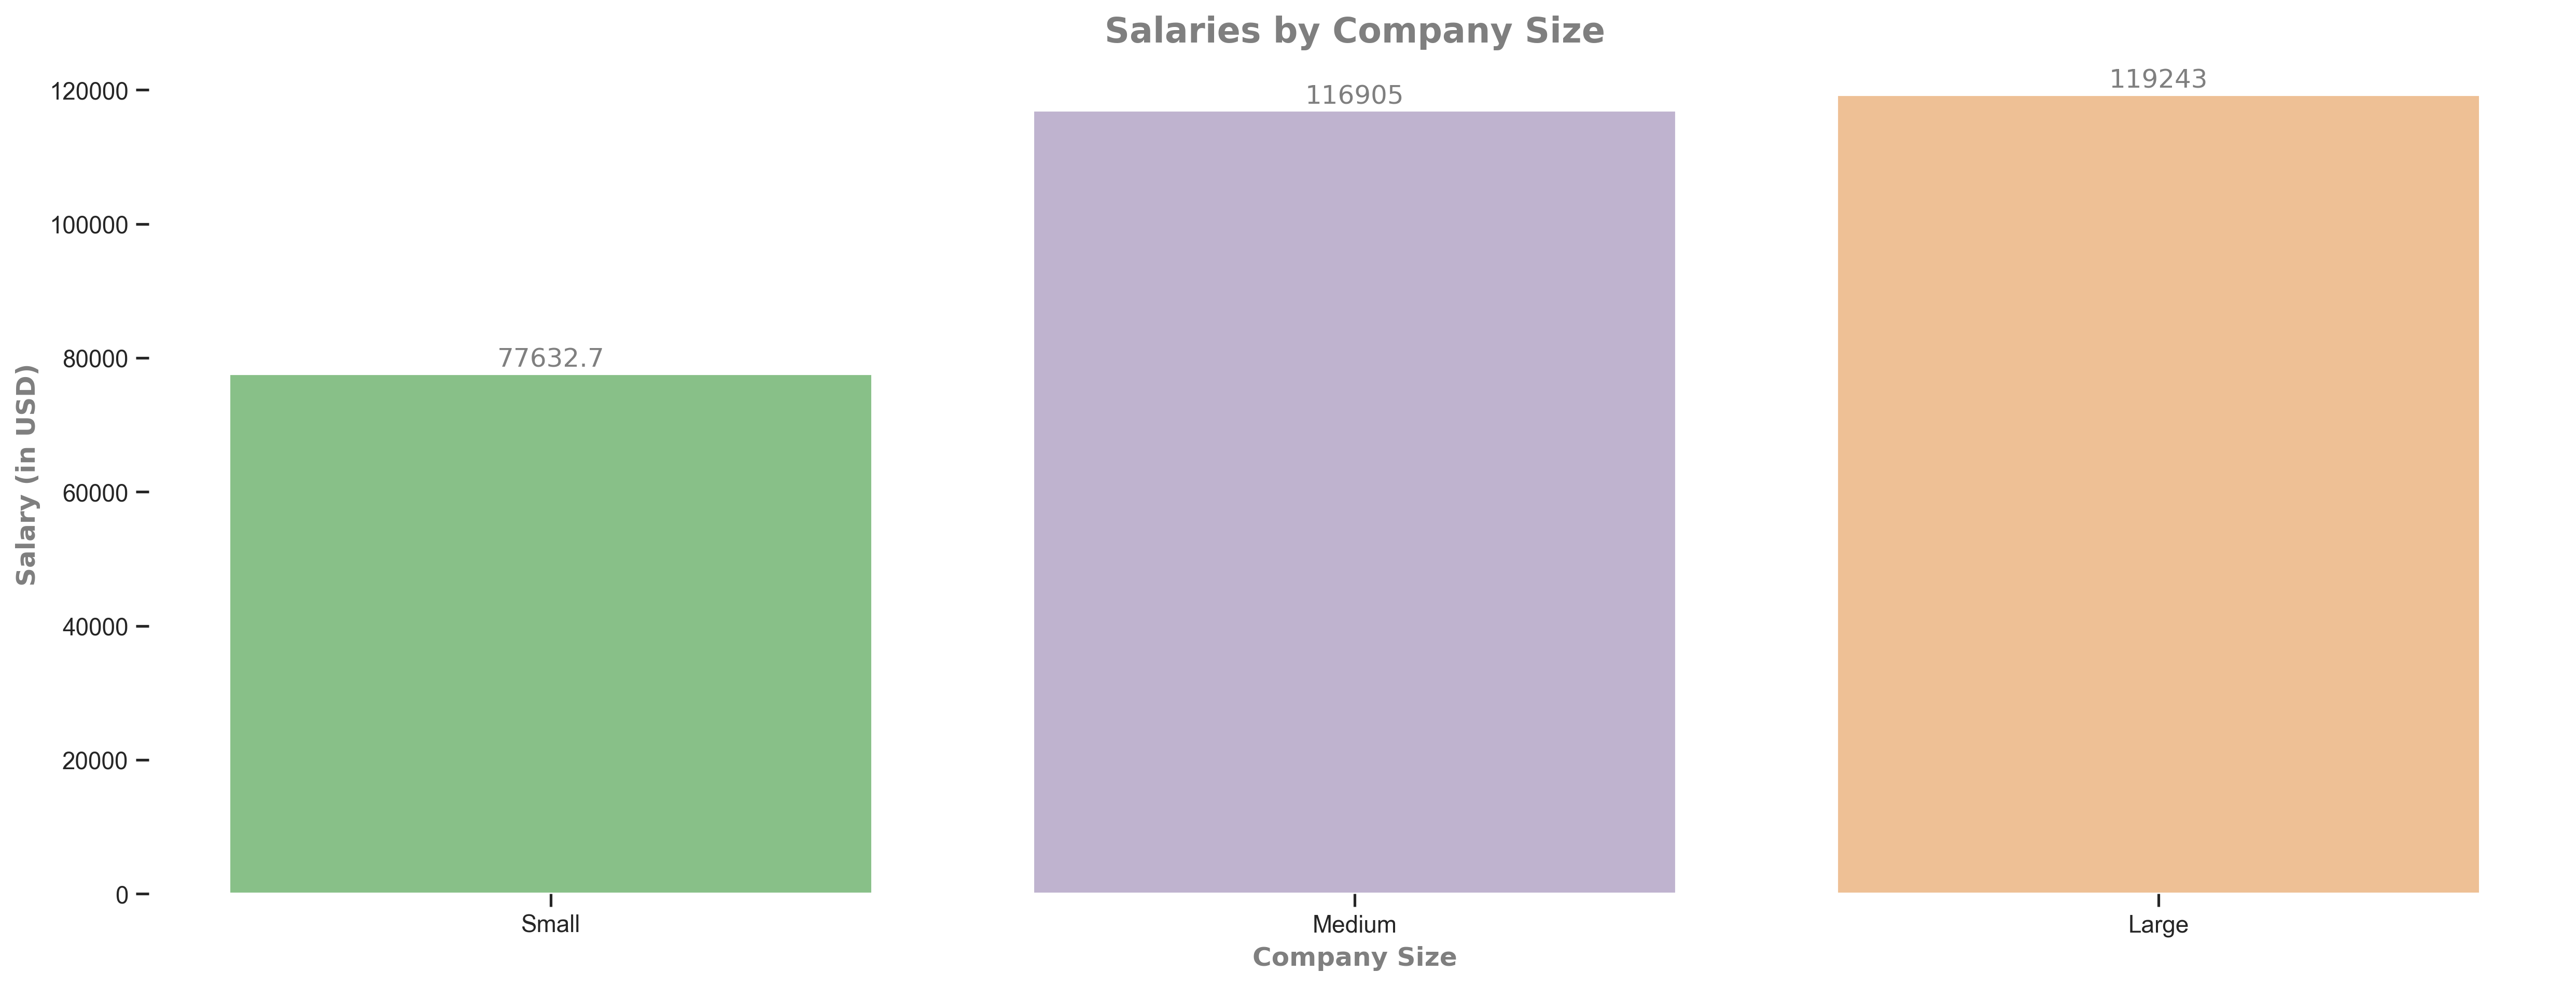

In [50]:
multivariate_plot(x="company_size", xlabel="Company Size")

In [51]:
large_medium_avg_salary = salaries[salaries["company_size"].isin(["Large", "Medium"])]["salary"].mean()
small_avg_salary = salaries[salaries["company_size"] == "Small"]["salary"].mean()
print(f'{(large_medium_avg_salary - small_avg_salary) / small_avg_salary * 100:.2f}%')

51.73%


* **Large** and **mid-size** companies are almost equal in terms of salaries. 
* When compared to **small-size** companies, **large/mid-size** companies pay approximately 51.73% more.


* **Possible Conclusion**: **Large** and **mid-size** companies pay about the same. Meanwhile, **small** companies are giving way less. I assume that, **small** companies have less money; therefore, they can't give too much money to their employees.



<div id = 'conclusion'
     style = "display: fill;
              border-radius: 5px;
              background-color: #00356b;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">6. Conclusion
    </h2>
</div>

We got some ideas by analyzing this dataset.
* Data science jobs are getting more popular.
* If an employee wants to get the highest salary possible, **United States** should be their choice. But of course, this analysis is purely based on the salaries. To give an answer to this, we should also analyze the cost of living, health-care, etc.
* **Large** and **mid-size** companies are providing more salaries compared to **small** ones.
* **Remote** jobs are more popular and also pay the most. This may be due to the pandemic.
* Salary increase becomes drastic once you have gained a **senior-level** experience.
* **Contract** and **full-time** employments are way to go for **2022**.
* **Data Engineers**, **Data Scientists**, and **Machine Learning Engineers** are the most valuable titles (by looking at their average salary).
* The majority of the data is based in the **United States**. Since the **United States** pays much higher wages than other countries, I don't believe these average salaries reflect reality. As a result, I would not base my expectations by looking at these average salaries.
* After conducting this analysis, I believe that pursuing a data science related job is a good career choice in terms of salary and remote options.